<a href="https://colab.research.google.com/github/lucasresck/FGV-EMAp/blob/master/Introduction%20to%20Computer%20Graphics/Final%20project/Final%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install opencv-python

In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
import time
from google.colab.patches import cv2_imshow

In [0]:
def medianFilter(img, height=0, width=0, r=1, rgb = False):
    if height == 0:
        height = len(img)
    if width == 0:
        width = int(np.floor(height / len(img) * len(img[0])))
    img = cv2.resize(img, (width, height))
    if rgb:
        red = img[:,:,0]
        green = img[:,:,1]
        blue = img[:,:,2]
        red2 = np.zeros((height, width))
        green2 = np.zeros((height, width))
        blue2 = np.zeros((height, width))
        img2 = np.zeros((height, width, 3))
        for h in range(0, height):
            for w in range(0, width):
                red_radius = red[np.maximum(0, h-r):1+np.minimum(h+r, height-1), np.maximum(0, w-r):1+np.minimum(w+r, width-1)]
                img2[h][w][0] = np.median(red_radius)
                green_radius = green[np.maximum(0, h-r):1+np.minimum(h+r, height-1), np.maximum(0, w-r):1+np.minimum(w+r, width-1)]
                img2[h][w][1] = np.median(green_radius)
                blue_radius = blue[np.maximum(0, h-r):1+np.minimum(h+r, height-1), np.maximum(0, w-r):1+np.minimum(w+r, width-1)]
                img2[h][w][2] = np.median(blue_radius)
        return img2
    
    img2 = np.zeros((height, width))
    for h in range(0, height):
        for w in range(0, width):
            radius = img[np.maximum(0, h-r):np.minimum(h+r+1, height-1), np.maximum(0, w-r):np.minimum(w+r+1, width-1)]
            img2[h][w] = np.median(radius)
    return img2

def meanFilter(img, height=0, width=0, r=1, rgb = False):
    if height == 0:
        height = len(img)
    if width == 0:
        width = int(np.floor(height / len(img) * len(img[0])))
    img = cv2.resize(img, (width, height))
    if rgb:
        red = img[:,:,0]
        green = img[:,:,1]
        blue = img[:,:,2]
        red2 = np.zeros((height, width))
        green2 = np.zeros((height, width))
        blue2 = np.zeros((height, width))
        img2 = np.zeros((height, width, 3))
        for h in range(0, height):
            for w in range(0, width):
                red_radius = red[np.maximum(0, h-r):1+np.minimum(h+r, height-1), np.maximum(0, w-r):1+np.minimum(w+r, width-1)]
                img2[h][w][0] = np.mean(red_radius)
                green_radius = green[np.maximum(0, h-r):1+np.minimum(h+r, height-1), np.maximum(0, w-r):1+np.minimum(w+r, width-1)]
                img2[h][w][1] = np.mean(green_radius)
                blue_radius = blue[np.maximum(0, h-r):1+np.minimum(h+r, height-1), np.maximum(0, w-r):1+np.minimum(w+r, width-1)]
                img2[h][w][2] = np.mean(blue_radius)
        return img2
    
    img2 = np.zeros((height, width))
    for h in range(0, height):
        for w in range(0, width):
            radius = img[np.maximum(0, h-r):1+np.minimum(h+r, height-1), np.maximum(0, w-r):1+np.minimum(w+r, width-1)]
            img2[h][w] = np.mean(radius)
    return img2

def gaussian(x, mu, sig):
    return np.exp(-0.5*((x - mu)/sig)**2.)/(sig*np.sqrt(2.*np.pi))

def gaussianBlur(img, sig, height=0, width=0, rgb = False):
    if height == 0:
        height = len(img)
    if width == 0:
        width = int(np.floor(height / len(img) * len(img[0])))
    img = cv2.resize(img, (width, height))
    
    r = int(3*np.ceil(sig))
    kernel = np.zeros(2*r + 1)
    N = len(kernel)
    for n in range(N):
        x = (n + 0.5) - N/2 
        kernel[n] = gaussian(x,0,sig)
    kernel = kernel/np.sum(kernel)    
    
    if rgb:
        red = img[:,:,0]
        green = img[:,:,1]
        blue = img[:,:,2]
        red2 = np.zeros((height, width))
        green2 = np.zeros((height, width))
        blue2 = np.zeros((height, width))
        for h in range(0, height):
            for w in range(0, width):
                red_neighbours = red[np.maximum(0, h-r):1+np.minimum(h+r, height-1), w]
                green_neighbours = green[np.maximum(0, h-r):1+np.minimum(h+r, height-1), w]
                blue_neighbours = blue[np.maximum(0, h-r):1+np.minimum(h+r, height-1), w]
                if len(red_neighbours) < N:
                    if h-r < 0:
                        red_neighbours = np.insert(red_neighbours, 0, np.flip(red_neighbours)[:r-h])
                        green_neighbours = np.insert(green_neighbours, 0, np.flip(green_neighbours)[:r-h])
                        blue_neighbours = np.insert(blue_neighbours, 0, np.flip(blue_neighbours)[:r-h])
                    else:
                        red_neighbours = np.insert(red_neighbours, len(red_neighbours), np.flip(red_neighbours[:h+r - (height-1)]))
                        green_neighbours = np.insert(green_neighbours, len(green_neighbours), np.flip(green_neighbours[:h+r - (height-1)]))
                        blue_neighbours = np.insert(blue_neighbours, len(blue_neighbours), np.flip(blue_neighbours[:h+r - (height-1)]))
                red2[h][w] = np.dot(red_neighbours, kernel)
                green2[h][w] = np.dot(green_neighbours, kernel)
                blue2[h][w] = np.dot(blue_neighbours, kernel)
                
        img2 = np.zeros((height, width, 3))
        for h in range(0, height):
            for w in range(0, width):
                red_neighbours = red2[h, np.maximum(0, w-r):1+np.minimum(w+r, width-1)]
                green_neighbours = green2[h, np.maximum(0, w-r):1+np.minimum(w+r, width-1)]
                blue_neighbours = blue2[h, np.maximum(0, w-r):1+np.minimum(w+r, width-1)]
                if len(red_neighbours) < N:
                    if w-r < 0:
                        red_neighbours = np.insert(red_neighbours, 0, np.flip(red_neighbours)[:r-w])
                        green_neighbours = np.insert(green_neighbours, 0, np.flip(green_neighbours)[:r-w])
                        blue_neighbours = np.insert(blue_neighbours, 0, np.flip(blue_neighbours)[:r-w])
                    else:
                        red_neighbours = np.insert(red_neighbours, len(red_neighbours), np.flip(red_neighbours[:w+r - (width-1)]))
                        green_neighbours = np.insert(green_neighbours, len(green_neighbours), np.flip(green_neighbours[:w+r - (width-1)]))
                        blue_neighbours = np.insert(blue_neighbours, len(blue_neighbours), np.flip(blue_neighbours[:w+r - (width-1)]))
                img2[h][w][0] = np.dot(red_neighbours, kernel)
                img2[h][w][1] = np.dot(green_neighbours, kernel)
                img2[h][w][2] = np.dot(blue_neighbours, kernel)
        
        return img2

    img2 = np.zeros((height, width))
    for h in range(0, height):
        for w in range(0, width):
            neighbours = img[np.maximum(0, h-r):1+np.minimum(h+r, height-1), w]
            neighbours_old = neighbours
            if len(neighbours) < N:
                if h-r < 0:
                    neighbours = np.insert(neighbours, 0, np.flip(neighbours)[:r-h])
                else:
                    neighbours = np.insert(neighbours, len(neighbours), np.flip(neighbours[:h+r - (height-1)]))
            img2[h][w] = np.dot(neighbours, kernel)
            
    img3 = np.zeros((height, width))
    for h in range(0, height):
        for w in range(0, width):
            neighbours = img2[h, np.maximum(0, w-r):1+np.minimum(w+r, width-1)]
            if len(neighbours) < N:
                if w-r < 0:
                    neighbours = np.insert(neighbours, 0, np.flip(neighbours)[:r-w])
                else:
                    neighbours = np.insert(neighbours, len(neighbours), np.flip(neighbours[:w+r - (width-1)]))
            img3[h][w] = np.dot(neighbours, kernel)
            
    return img3
    

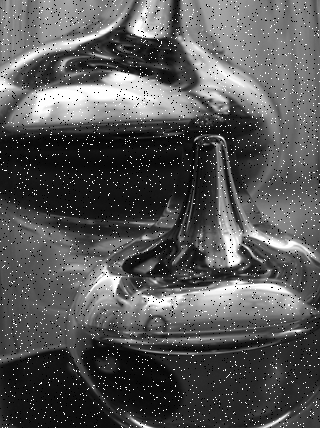

In [3]:
#Put the image in a "content" folder
img1 = cv2.imread('/content/Salt-and-pepper noise.png', cv2.IMREAD_UNCHANGED)
#https://upload.wikimedia.org/wikipedia/commons/f/f4/Noise_salt_and_pepper.png
cv2_imshow(img1)

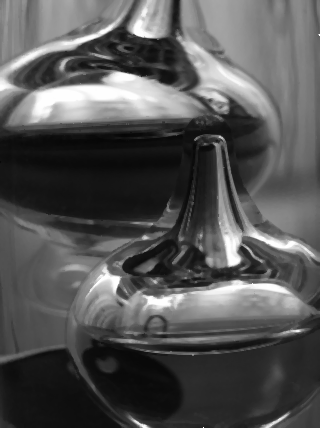

In [4]:
cv2_imshow(medianFilter(img1))

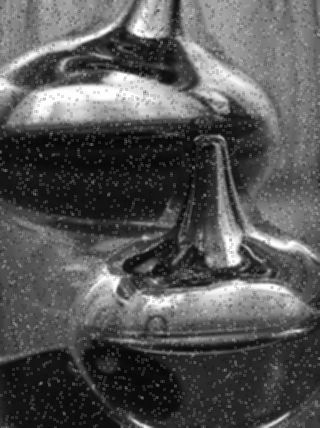

In [5]:
cv2_imshow(meanFilter(img1))

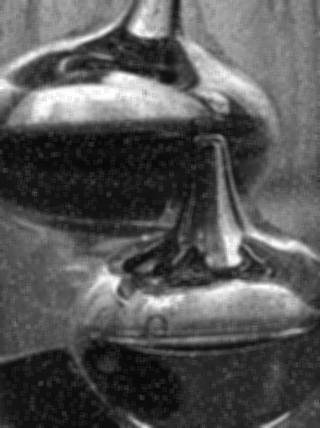

In [6]:
cv2_imshow(meanFilter(img1, r=2))

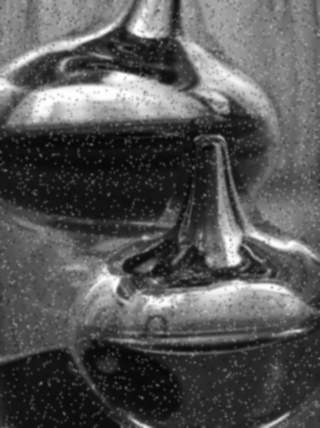

In [7]:
cv2_imshow(gaussianBlur(img1, 1.))

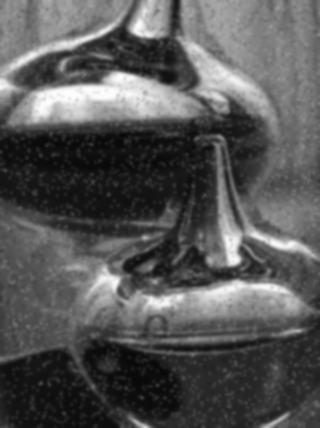

In [8]:
cv2_imshow(gaussianBlur(img1, 1.5))

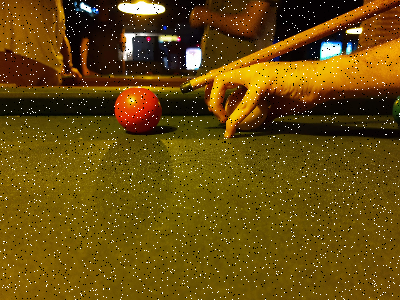

In [9]:
img2 = cv2.imread('/content/Before salt-and-pepper noise.jpg', cv2.IMREAD_UNCHANGED)
img2 = cv2.resize(img2, (400, 300))

random.seed(time.time())
p = 0.02

for h in range(len(img2)):
    for w in range(len(img2[0])):
        if random.random() < p:
            img2[h][w][0] = 0
            img2[h][w][1] = 0
            img2[h][w][2] = 0
        if random.random() > 1 - p:
            img2[h][w][0] = 255
            img2[h][w][1] = 255
            img2[h][w][2] = 255
            
cv2_imshow(img2)

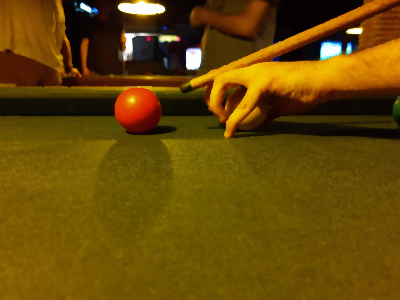

In [10]:
cv2_imshow(medianFilter(img2, rgb=True))

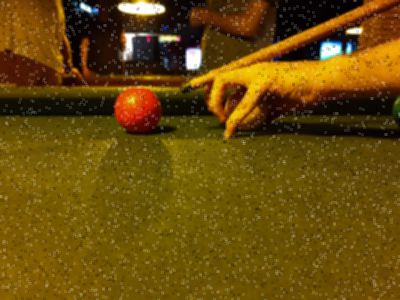

In [11]:
cv2_imshow(meanFilter(img2, rgb=True))

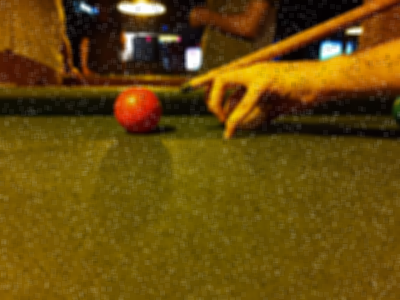

In [12]:
cv2_imshow(meanFilter(img2, rgb=True, r=2))

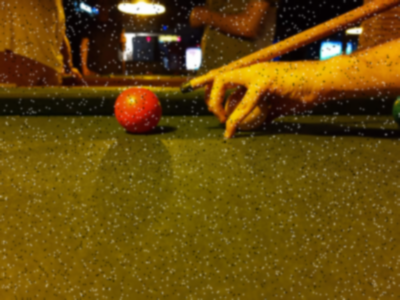

In [13]:
cv2_imshow(gaussianBlur(img2, 1, rgb=True))

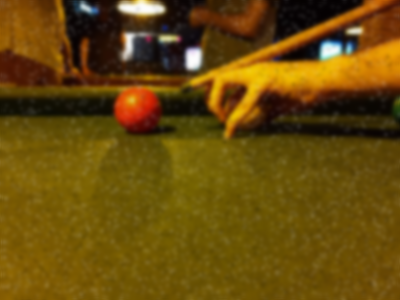

In [18]:
cv2_imshow(gaussianBlur(img2, 2, rgb=True))